In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

import pathlib

import os

*/*.JPG, */*.jpg and */*.* all return different values, meaning the dataset has different file types

In [2]:
train_dir = pathlib.Path('dataset/train')
val_dir = pathlib.Path('dataset/valid')


train_count = len(list(train_dir.glob('*/*.*')))
val_count = len(list(val_dir.glob('*/*.*')))
print(train_count)
print(val_count)


25835
6678


In [3]:
# bacterial_spot = list(data_dir.glob('Tomato___Bacterial_spot/*'))
# early_blight = list(data_dir.glob('Tomato___Early_blight/*'))
# healthy = list(data_dir.glob('Tomato___healthy/*'))
# late_blight = list(data_dir.glob('Tomato___Late_blight/*'))
# leaf_mold = list(data_dir.glob('Tomato___Leaf_Mold/*'))
# septoria_leaf_spot = list(data_dir.glob('Tomato___Septoria_leaf_spot/*'))
# spider_mites = list(data_dir.glob('Tomato___Spider_mites Two-spotted_spider_mite/*'))
# target_spot = list(data_dir.glob('Tomato___Target_Spot/*'))
# mosaic = list(data_dir.glob('Tomato___Tomato_mosaic_virus/*'))
# yellow_leaf_curl = list(data_dir.glob('Tomato___Tomato_Yellow_Leaf_Curl_Virus/*'))

# for img in yellow_leaf_curl:
#     arr = np.array(PIL.Image.open(img))
#     if not (arr.shape == (256, 256, 3)):
#         raise Exception

# subfolders = [ f.path for f in os.scandir('dataset/train') if f.is_dir() ]
# for subdir in subfolders:
#     print(subdir)
#     for file in os.listdir(subdir):
#         if not (file.endswith(".jpg") or file.endswith('JPG') or file.endswith('png') or file.endswith('jpeg')):
#             print(file)
            
    # PIL.Image.open(str(imgs[0]))


# import imghdr

# data_dir = "dataset/valid/Bacterial_spot"
# image_extensions = [".png", ".jpg", "jpeg", "JPG"]  # add there all your images file extensions

# img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
# for filepath in pathlib.Path(data_dir).rglob("*"):
#     if filepath.suffix.lower() in image_extensions:
#         img_type = imghdr.what(filepath)
#         if img_type is None:
#             print(f"{filepath} is not an image")
#             os.unlink(filepath)
#         elif img_type not in img_type_accepted_by_tf:
#             print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
#             os.unlink(filepath)

from os import listdir
import cv2

#for filename in listdir('C:/tensorflow/models/research/object_detection/images/train'):
yourDirectory = 'dataset/valid/'
corrupted = []
for folder in listdir(yourDirectory):
    print(folder)
    for filename in listdir(yourDirectory+folder):
        # if filename.endswith(".jpg"):
        # print(yourDirectory+filename)
        #cv2.imread('C:/tensorflow/models/research/object_detection/images/train/'+filename)
        try:
            cv2.imread(yourDirectory+folder+'/'+filename)
            # print(filename)
        except:
            print(filename)
            corrupted.add(filename)

print(corrupted)

Late_blight
Septoria_leaf_spot
Tomato_Yellow_Leaf_Curl_Virus
powdery_mildew
healthy
Early_blight
Target_Spot
Leaf_Mold
Tomato_mosaic_virus
Bacterial_spot
Spider_mites Two-spotted_spider_mite
[]


In [4]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25835 files belonging to 11 classes.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-02-13 19:47:18.156645: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-13 19:47:18.156975: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 6678 files belonging to 11 classes.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus', 'healthy', 'powdery_mildew']


2023-02-13 19:47:18.735123: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


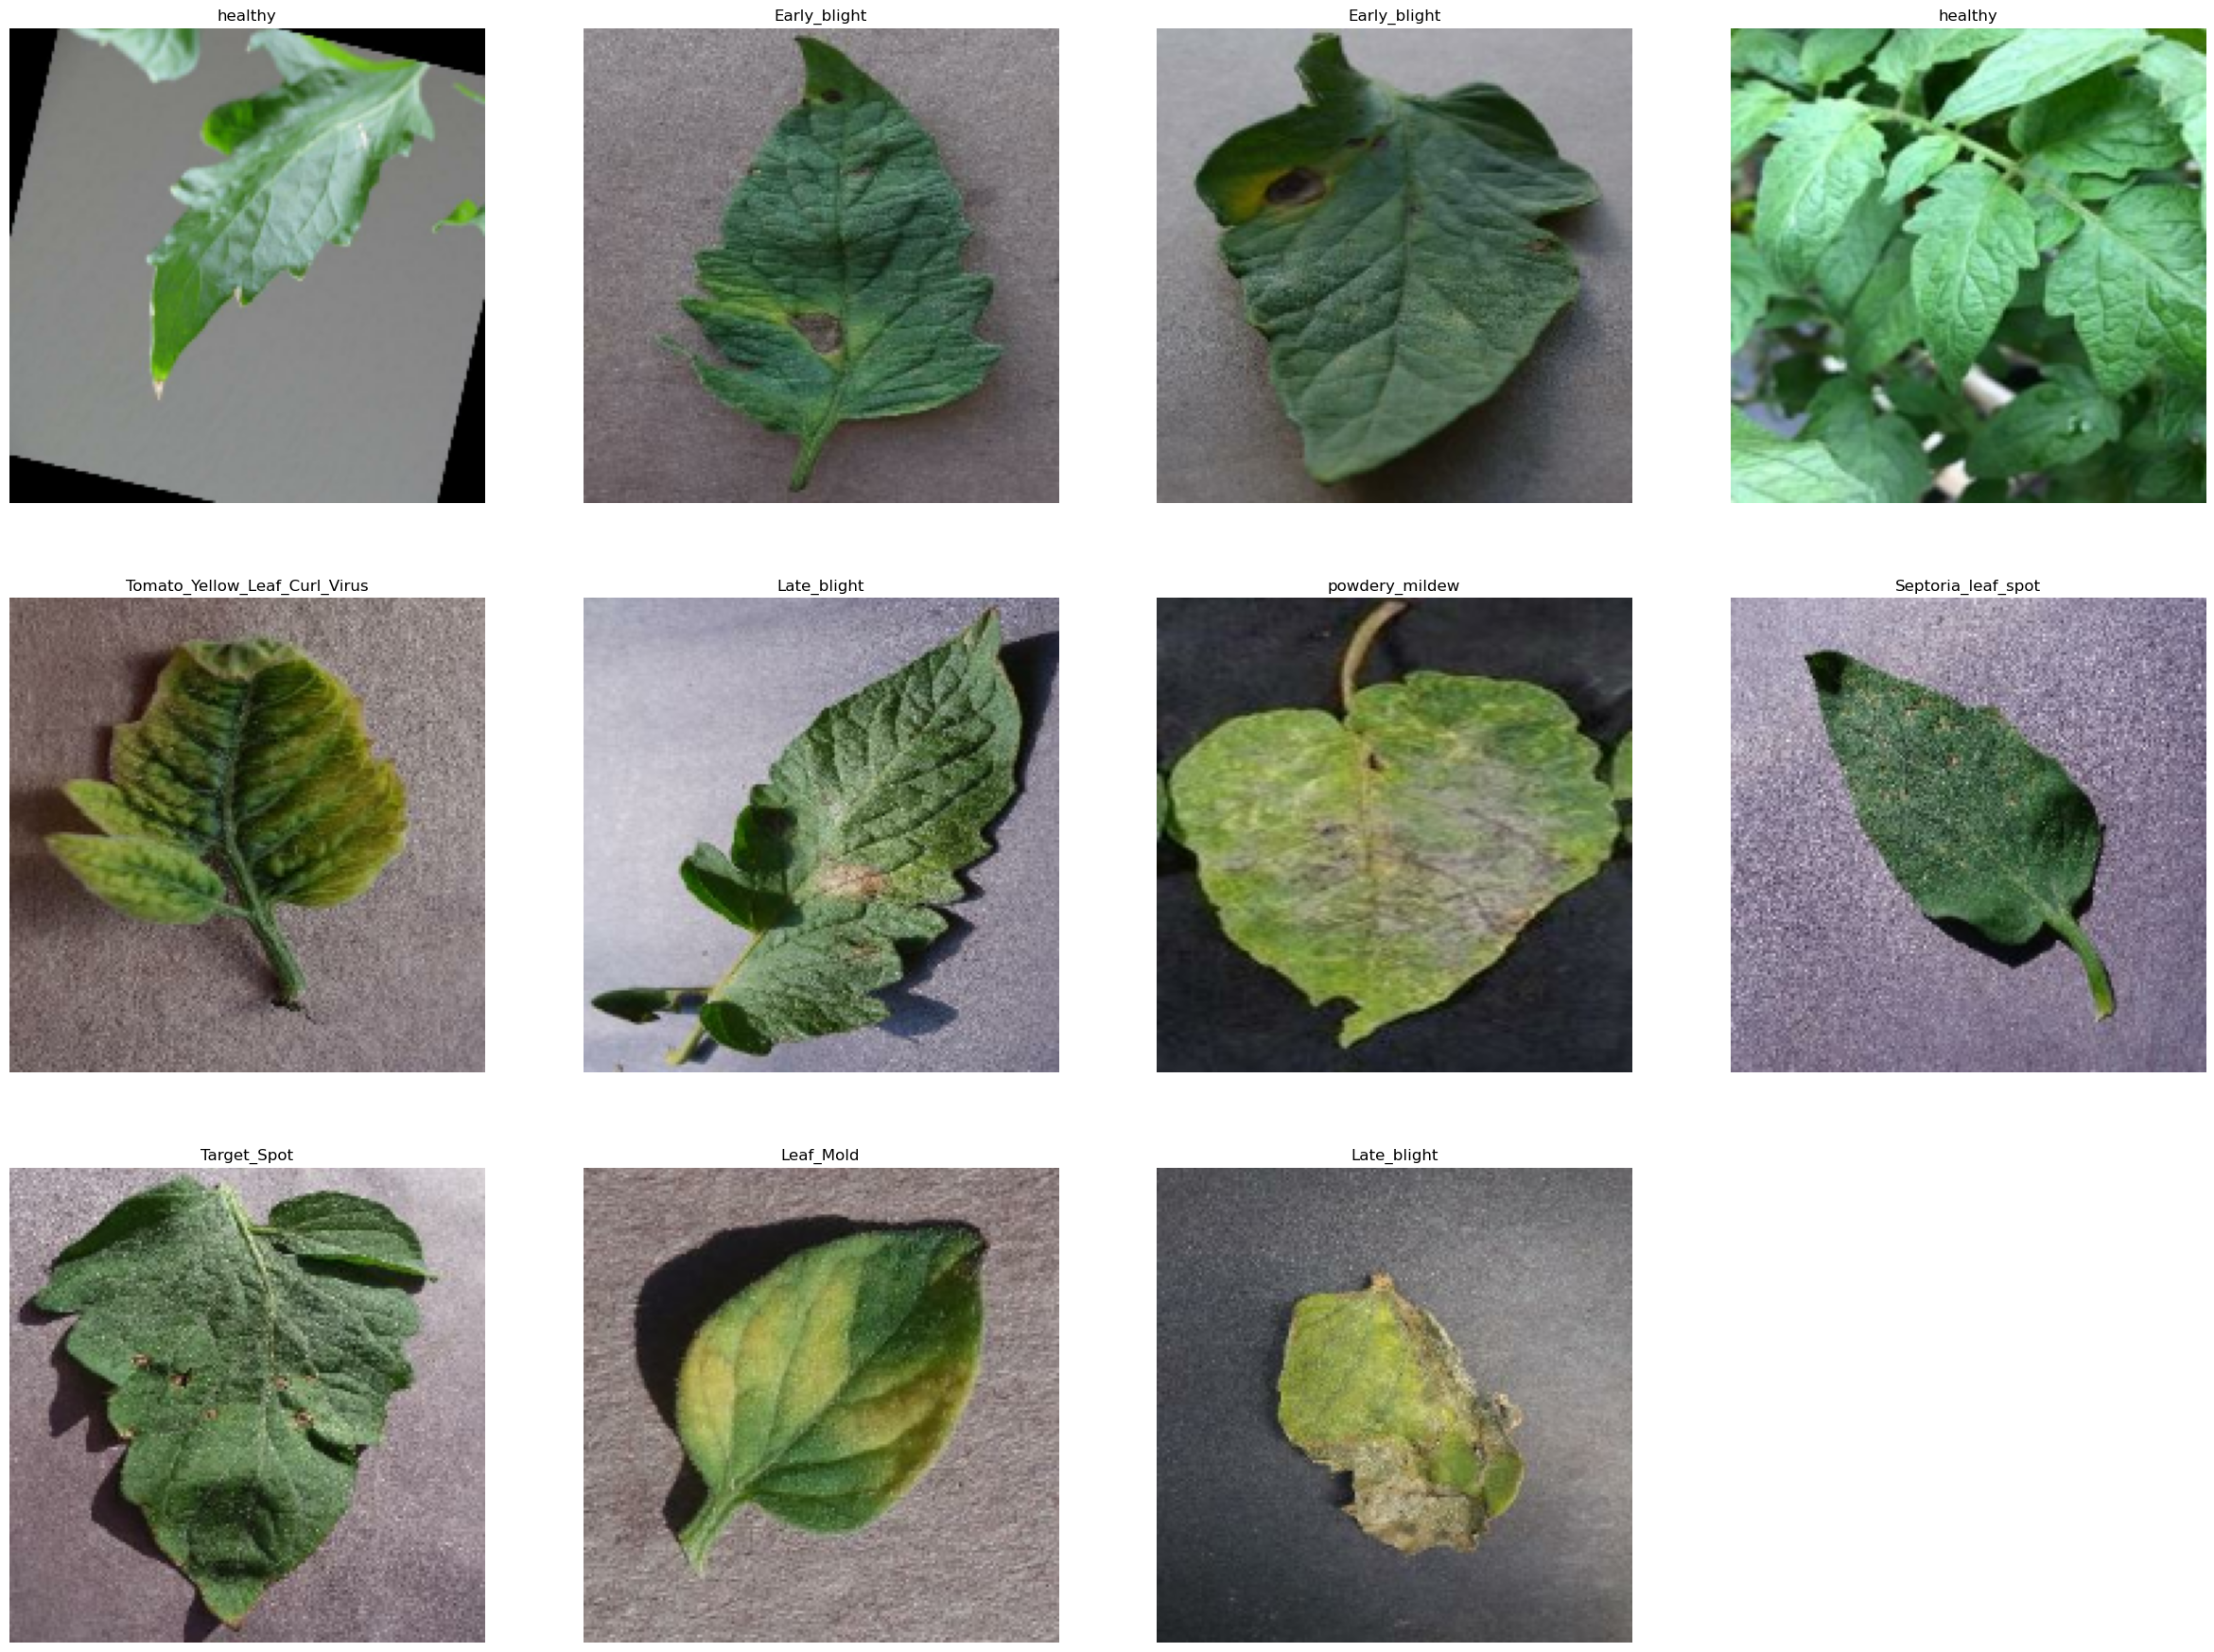

In [6]:
plt.figure(figsize=(30, 30))
for images, labels in train_ds.take(1):
  for i in range(11):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    # layers.RandomCrop(img_height, img_width),
    # layers.RandomTranslation(height_factor=(-0.2, 0.3), width_factor=(-0.2, 0.3))
  ]
)

2023-02-13 19:47:31.302509: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 583 of 1000
2023-02-13 19:47:35.279053: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


2023-02-13 19:47:36.390262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:37.991607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:38.757286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:39.377158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:40.036060: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:40.574203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:41.277862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:41.826411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:42.530084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:43.080952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:43.729066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:44.309222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:45.034980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:45.592937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:46.321515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:46.896177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:47.558756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:48.176848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:48.834427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:49.400329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:50.120859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-02-13 19:47:50.694936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


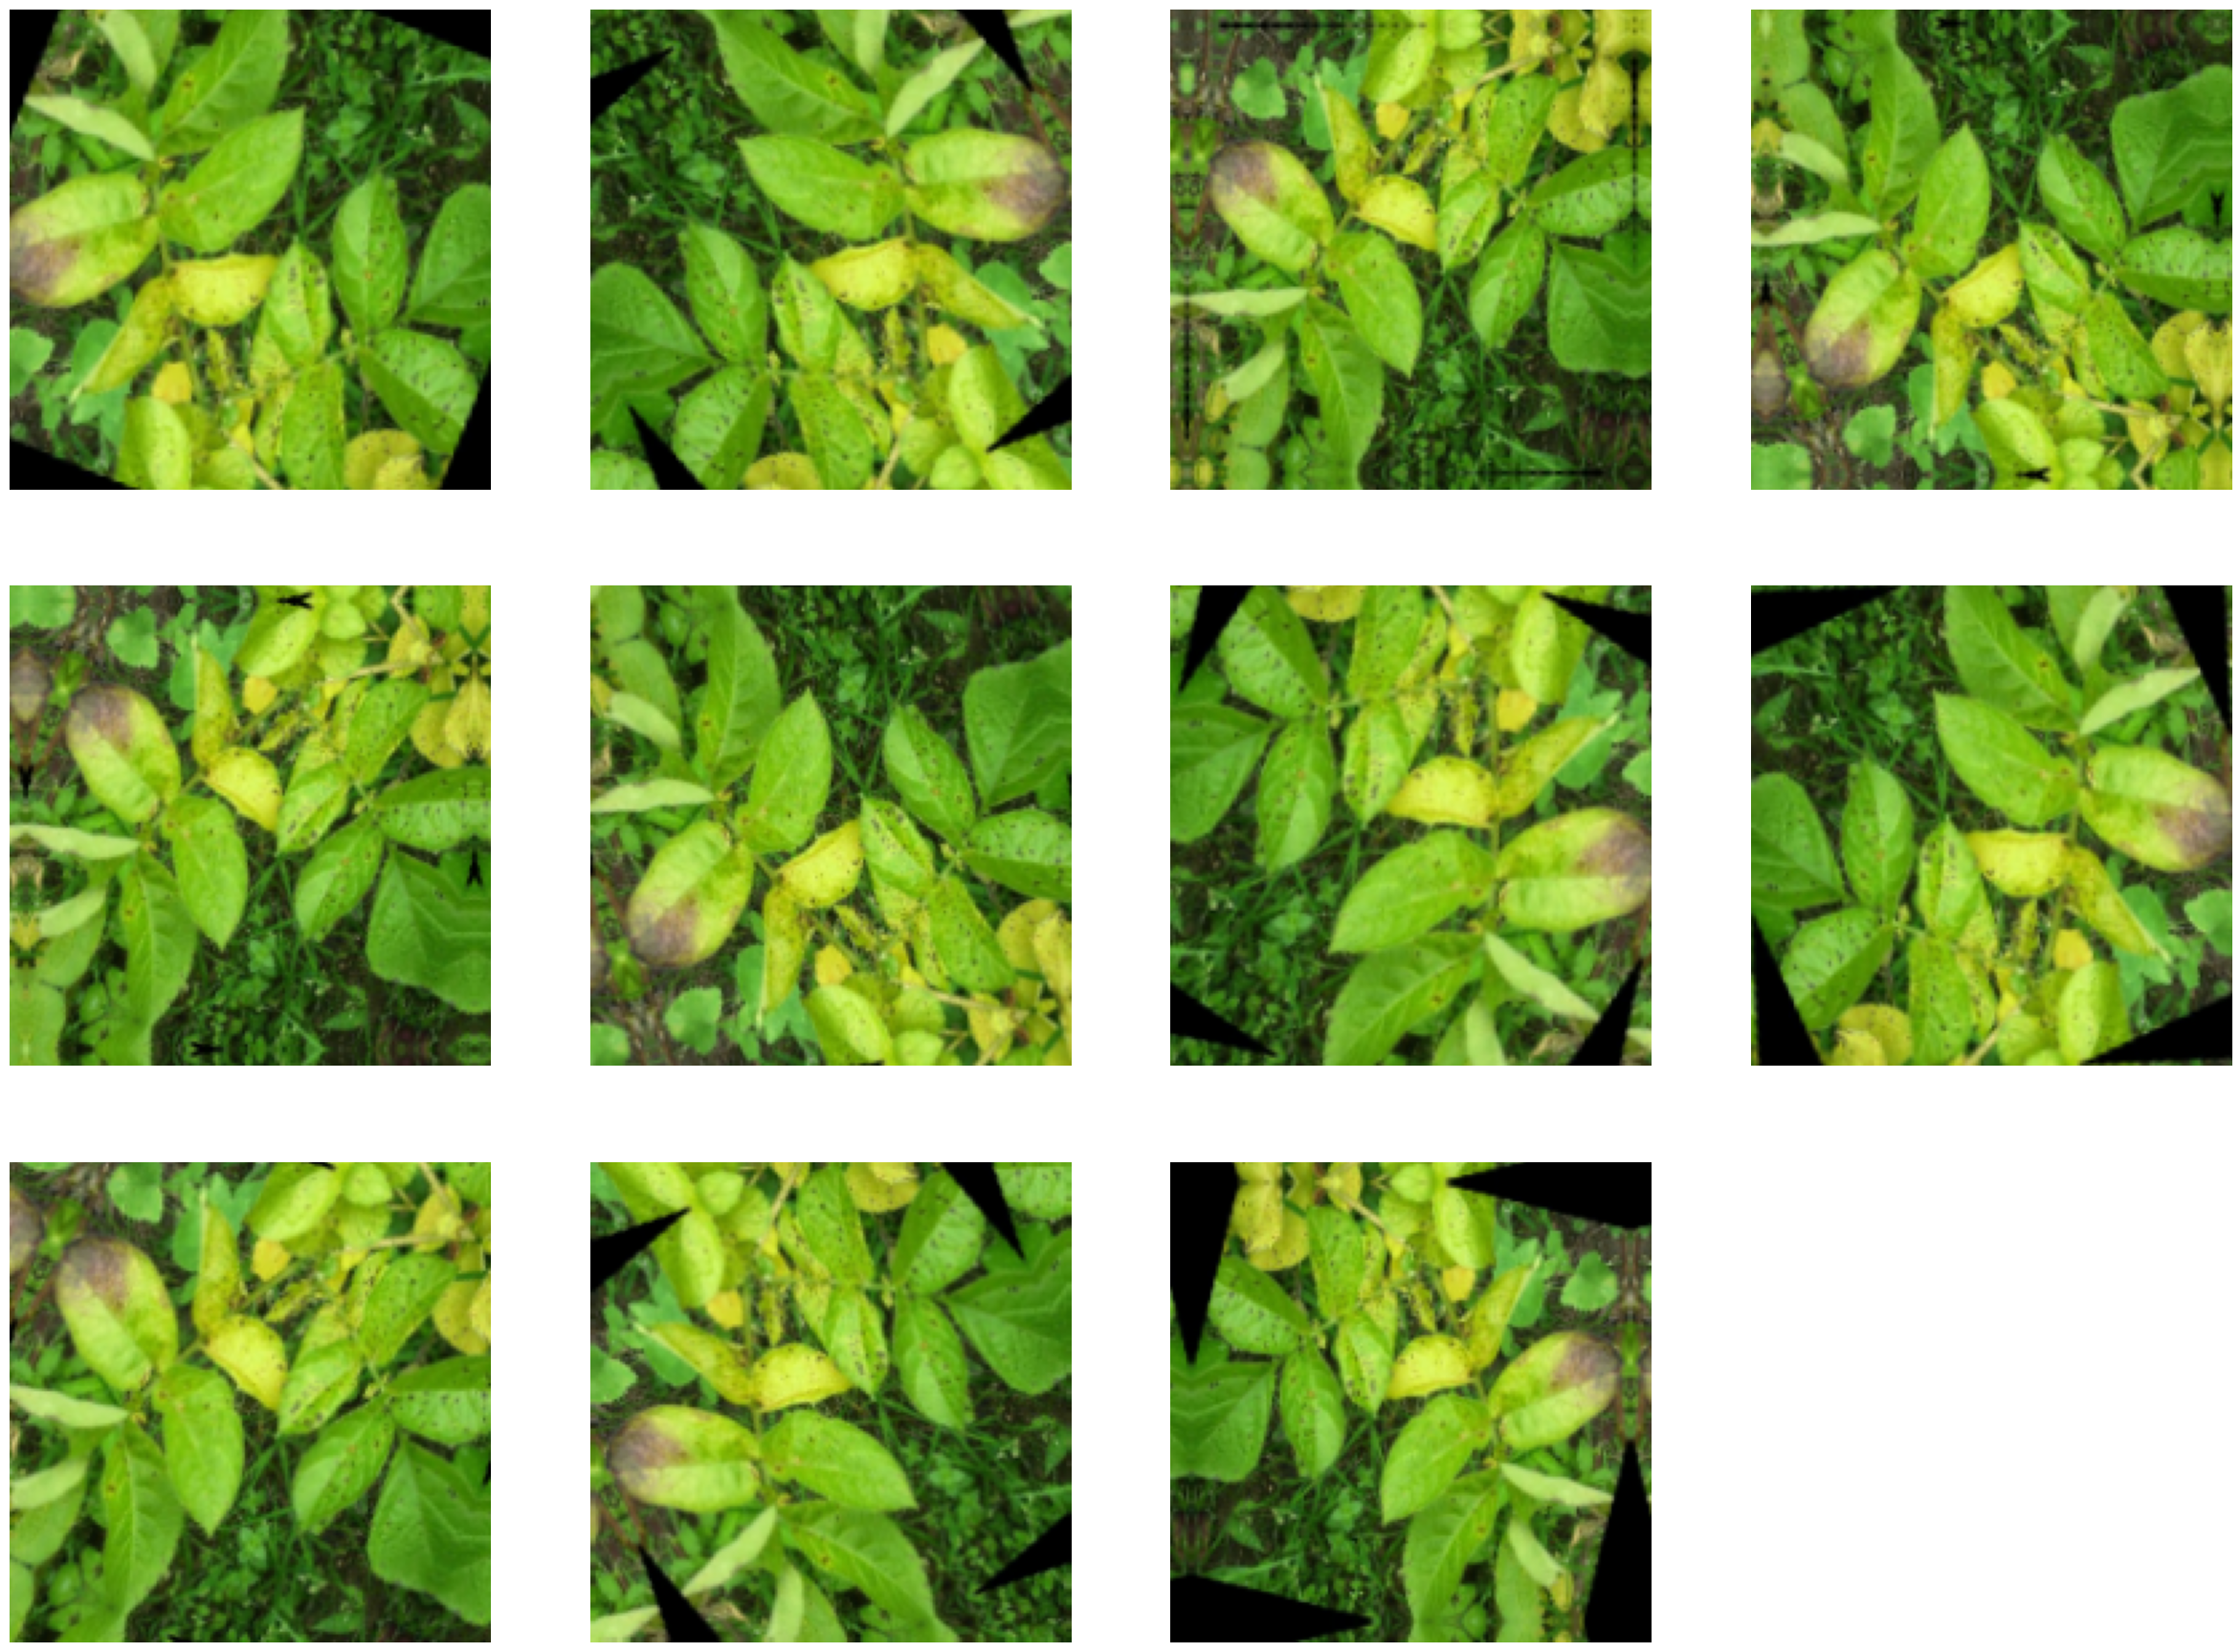

In [10]:
plt.figure(figsize=(30, 30))
for images, _ in train_ds.take(1):
  for i in range(11):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [11]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  # layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs=35
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/35


2023-02-13 19:47:54.923965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


808/808 [==============================] - ETA: 0s - loss: 4.0777 - accuracy: 0.1407

2023-02-13 19:53:15.285525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


808/808 [==============================] - 328s 400ms/step - loss: 4.0777 - accuracy: 0.1407 - val_loss: 2.1436 - val_accuracy: 0.2168
Epoch 2/35
 23/808 [..............................] - ETA: 5:06 - loss: 2.1265 - accuracy: 0.2391

KeyboardInterrupt: 

In [ ]:
import datetime

# print(str(datetime.datetime.now()))
model.save('saved_model/model'+str(datetime.datetime.now()))

: 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

: 

In [ ]:
model.evaluate(val_ds)

: 

CLASSIFY NEW DATA

In [ ]:
leaf_path = pathlib.Path('mosaic2.png')

img = tf.keras.utils.load_img(
    leaf_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

: 